# Tensorflow Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise

array([ 0.59938905, -0.01890762, -0.7993285 , ..., -1.39709433,
       -0.66132347, -0.21255759])

In [6]:
y_true = (0.5* x_data)+ 5 + noise

In [7]:
x_df = pd.DataFrame(data= x_data, columns=['X Data'])

In [8]:
y_df = pd.DataFrame(data= y_true, columns=['Y'])

In [9]:
my_data = pd.concat([x_df, y_df], axis=1 )

In [10]:
my_data.head()

,X Data,Y
0,0.00000,5.599389
1,0.00001,4.981097
2,0.00002,4.200681
3,0.00003,5.893396
4,0.00004,4.495462


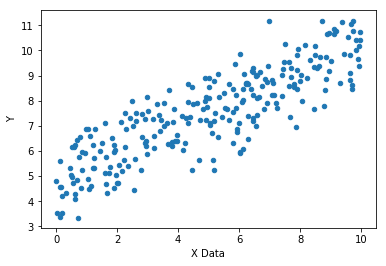

In [11]:
my_data.sample(n=250).plot(kind= 'scatter', x='X Data', y='Y')

#### Batch Size

In [12]:
batch_size = 8

In [13]:
np.random.randn(2)

array([-0.65152652, -0.11901627])

#### Variables

In [14]:
m = tf.Variable(0.85)
b = tf.Variable(0.87)

#### Placeholders

In [15]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

#### Graph

In [16]:
y_model = m* xph + b

#### Loss function

In [17]:
error = tf.reduce_sum(tf.square(yph - y_model))

#### Optimizer

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

#### Initialize Variable

In [19]:
init = tf.global_variables_initializer()

#### Session

In [20]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size= batch_size)  #random index returns random integer from 0 to length of x_data of size 8 (batch size)
        
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [21]:
model_m

0.43888676

In [22]:
model_b

4.850715

#### Visualization

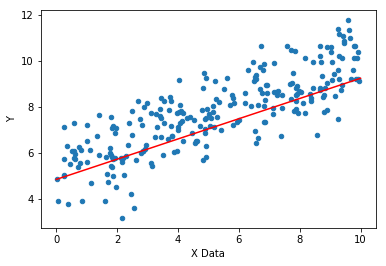

In [23]:
y_hat = model_m * x_data + model_b
my_data.sample(n=250).plot(kind= 'scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

#### Tensorflow estimator API

1.Define a list of feature columns    
2.Create Estimator model   
3.Create a Data Input function  
4.Call, train, evaluate and predict methods on the estimator object

In [24]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [25]:
estimator = tf.estimator.LinearRegressor(feature_columns= feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\pasan\\AppData\\Local\\Temp\\tmpn84f0398', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000029968FB1BA8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size = 0.3, random_state= 101 )

#### Setup estimator inputs

In [29]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None,shuffle= True )

In [30]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle= False )

In [31]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle= False )

#### Train the estimator

In [32]:
estimator.train(input_fn = input_func, steps= 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\pasan\AppData\Local\Temp\tmpn84f0398\model.ckpt.
INFO:tensorflow:loss = 479.68536, step = 1
INFO:tensorflow:global_step/sec: 391.465
INFO:tensorflow:loss = 34.96376, step = 101 (0.255 sec)
INFO:tensorflow:global_step/sec: 580.339
INFO:tensorflow:loss = 29.131058, step = 201 (0.172 sec)
INFO:tensorflow:global_step/sec: 618.59
INFO:tensorflow:loss = 45.52458, step = 301 (0.161 sec)
INFO:tensorflow:global_step/sec: 646.459
INFO:tensorflow:loss = 11.481478, step = 401 (0.156 sec)
INFO:tensorflow:global_step/sec: 654.418
INFO:tensorflow:loss = 11.225479, step = 501 (0.151 sec)
INFO:tensorflow:global_step/sec: 691.387
INFO:tensorflow:loss = 15.331537, step = 601 (0.146 sec)
INFO:tensorflow:global_step/sec

### Evaluation

In [33]:
train_metrics = estimator.evaluate(input_fn= train_input_func, steps=1000) 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-22-05:22:33
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\pasan\AppData\Local\Temp\tmpn84f0398\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-12-22-05:22:35
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0876828, global_step = 1000, loss = 8.701463


In [34]:
eval_metrics = estimator.evaluate(input_fn= eval_input_func, steps=1000) 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-22-05:23:55
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\pasan\AppData\Local\Temp\tmpn84f0398\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-12-22-05:23:57
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0872262, global_step = 1000, loss = 8.697809


In [41]:
print("TRAIN METRICS: {}".format(train_metrics))
print("EVAL METRICS : {}".format(eval_metrics))

TRAIN METRICS: {'average_loss': 1.0876828, 'loss': 8.701463, 'global_step': 1000}
EVAL METRICS : {'average_loss': 1.0872262, 'loss': 8.697809, 'global_step': 1000}


### Predictions

In [44]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': np.linspace(0,10,10)}, shuffle= False)

In [45]:
list(estimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\pasan\AppData\Local\Temp\tmpn84f0398\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4170084], dtype=float32)},
 {'predictions': array([5.059545], dtype=float32)},
 {'predictions': array([5.702081], dtype=float32)},
 {'predictions': array([6.344618], dtype=float32)},
 {'predictions': array([6.987154], dtype=float32)},
 {'predictions': array([7.62969], dtype=float32)},
 {'predictions': array([8.272226], dtype=float32)},
 {'predictions': array([8.914763], dtype=float32)},
 {'predictions': array([9.557301], dtype=float32)},
 {'predictions': array([10.199837], dtype=float32)}]

In [46]:
predictions= []

for x in estimator.predict(input_fn = input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\pasan\AppData\Local\Temp\tmpn84f0398\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [47]:
predictions

[array([4.4170084], dtype=float32),
 array([5.059545], dtype=float32),
 array([5.702081], dtype=float32),
 array([6.344618], dtype=float32),
 array([6.987154], dtype=float32),
 array([7.62969], dtype=float32),
 array([8.272226], dtype=float32),
 array([8.914763], dtype=float32),
 array([9.557301], dtype=float32),
 array([10.199837], dtype=float32)]

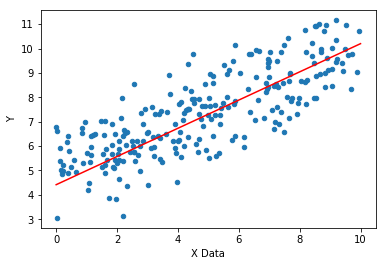

In [48]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')